In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("Reliance.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (6478, 5)


,Open,High,Low,Close,Volume
0,24.817513,24.864784,24.439341,24.533884,2.988973e+09
1,24.533884,24.533884,24.533884,24.533884,0.000000e+00
2,24.722969,25.006599,24.675697,25.006599,3.814050e+09
3,25.053869,25.148413,24.912056,24.959328,3.284070e+09
4,25.006599,25.242956,24.912056,25.053869,2.625803e+09


In [3]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close'] =  df['Close'].shift(-1)
df.head()

,Open,High,Low,Close,Volume
0,24.817513,24.864784,24.439341,24.533884,2.988973e+09
1,24.533884,24.533884,24.533884,25.006599,0.000000e+00
2,24.722969,25.006599,24.675697,24.959328,3.814050e+09
3,25.053869,25.148413,24.912056,25.053869,3.284070e+09
4,25.006599,25.242956,24.912056,25.337500,2.625803e+09


In [4]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df.head()

,Open,High,Low,Volume,Close
0,24.817513,24.864784,24.439341,2.988973e+09,24.533884
1,24.533884,24.533884,24.533884,0.000000e+00,25.006599
2,24.722969,25.006599,24.675697,3.814050e+09,24.959328
3,25.053869,25.148413,24.912056,3.284070e+09,25.053869
4,25.006599,25.242956,24.912056,2.625803e+09,25.337500


In [5]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

<AxesSubplot:>

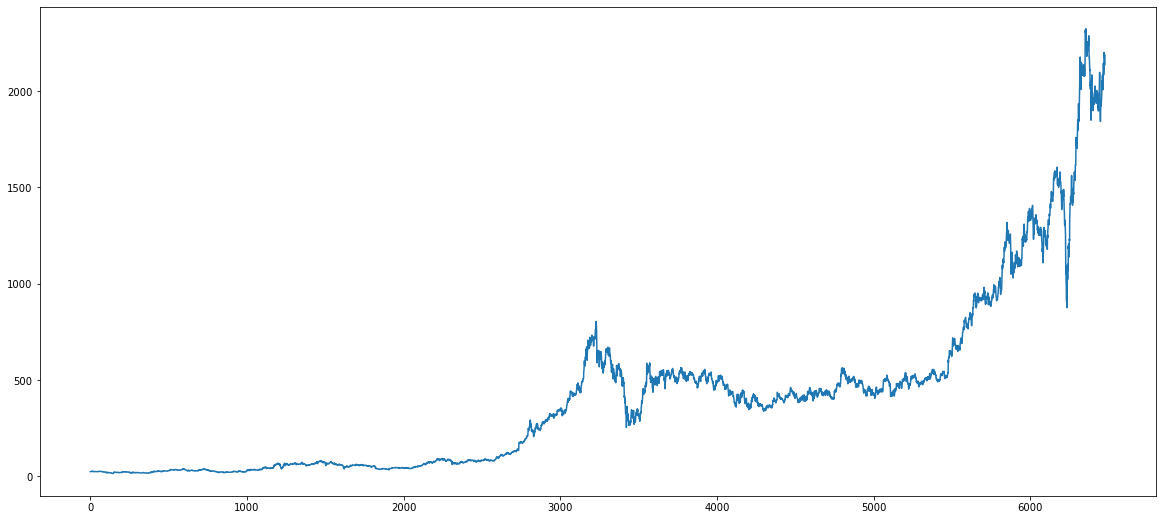

In [6]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [7]:
#columns for x and y
x  = df[['Open','High','Low','Volume']]
y = df['Close']

In [8]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume']] = scaler.fit_transform(df[['Open','High','Low','Volume']])
df.head()

,Open,High,Low,Volume,Close
0,0.004503,0.004337,0.004465,0.047188,24.533884
1,0.004381,0.004197,0.004506,0.000000,25.006599
2,0.004463,0.004398,0.004568,0.060214,24.959328
3,0.004606,0.004458,0.004670,0.051847,25.053869
4,0.004585,0.004498,0.004670,0.041454,25.337500


In [9]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4839, 4)
(1614, 4)
(4839,)
(1614,)


---
# Random Forest

In [10]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [11]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
2218,88.531868,90.351329,1.819461
4030,505.075012,506.847000,1.771988
1891,36.603233,36.674422,0.071189
3870,484.049988,488.432252,4.382264
4897,466.174988,481.699248,15.524260
1476,77.525185,77.878263,0.353078
2378,71.222954,74.406383,3.183429
4313,357.049988,347.734628,9.315360
3431,301.750000,316.076003,14.326003
1255,62.114689,68.925277,6.810588


In [12]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9990327239157282
Mean Absolute Error: 7.189697567083382
Mean Squared  Error: 207.44098511563737
Root Mean Squared Error: 14.402811708678183
Loss: 7.189697567083382


---
# k-NN

In [13]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [14]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
2218,88.531868,164.564129,76.032261
4030,505.075012,436.825012,68.250000
1891,36.603233,548.375000,511.771767
3870,484.049988,476.074997,7.974991
4897,466.174988,509.125000,42.950012
1476,77.525185,73.407841,4.117344
2378,71.222954,54.008581,17.214373
4313,357.049988,398.362503,41.312515
3431,301.750000,277.041914,24.708086
1255,62.114689,66.867363,4.752674


In [15]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [16]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.6292771291496433
Mean Absolute Error: 148.57012893153654
Mean Squared  Error: 79504.8267858197
Root Mean Squared Error: 281.9660028900997
Loss: 148.57012893153654


---
# Decision Tree

In [17]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [18]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
2218,88.531868,90.299820,1.767952
4030,505.075012,513.025024,7.950012
1891,36.603233,36.682648,0.079415
3870,484.049988,489.000000,4.950012
4897,466.174988,484.725006,18.550018
1476,77.525185,77.863647,0.338462
2378,71.222954,75.157829,3.934875
4313,357.049988,350.600006,6.449982
3431,301.750000,315.350006,13.600006
1255,62.114689,73.365295,11.250606


In [19]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9983530042989055
Mean Absolute Error: 9.451486156237092
Mean Squared  Error: 353.2129205628796
Root Mean Squared Error: 18.79395968291088
Loss: 9.451486156237092


---
# Linear Regression

In [20]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [21]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-6.68290108e-01  8.75947216e-01  7.91845328e-01 -1.88318101e-13]
-0.032958536218529844


In [22]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
2218,88.531868,91.493308,2.961440
4030,505.075012,505.189724,0.114712
1891,36.603233,37.251284,0.648051
3870,484.049988,485.676472,1.626484
4897,466.174988,480.277925,14.102937
1476,77.525185,77.349707,0.175478
2378,71.222954,73.040164,1.817210
4313,357.049988,351.402023,5.647965
3431,301.750000,321.441120,19.691120
1255,62.114689,65.528276,3.413587


In [23]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9992699292826105
Mean Absolute Error: 6.2898424632671786
Mean Squared  Error: 156.5701781341827
Root Mean Squared Error: 12.512800571182405
Loss: 6.2898424632671786
